# Predicting Monopoly Hotel Prices

If you've played the game
[Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)
you will know that some properties cost more than others, and 
the rent charged for a Hotel.

There's a relationship between them. Let's find out what it is.

The set of properties is on an HTML table here:
http://www.jdawiseman.com/papers/trivia/monopoly-rents.html

In [240]:
%matplotlib inline
import pandas
url = 'http://www.jdawiseman.com/papers/trivia/monopoly-rents.html'
dfs = pandas.read_html(url, header=1, index_col=0)

In [241]:
# There should only be one DataFrame.
# Make a copy of it and drop all the rows with NaN values (these
# are the railway stations and the utilities)
len(dfs)

1

In [242]:
dfs[0].copy()

,Cost,M’tg,Site,1 hse,2 hses,3 hses,4 hses,Hotel
Property,,,,,,,,
Old Kent Road,60,30,2,10.0,30.0,90.0,160.0,250.0
Whitechapel Road,60,30,4,20.0,60.0,180.0,320.0,450.0
Kings Cross Station,200,100,25 or 50 or 100 or 200,NaN,NaN,NaN,NaN,NaN
The Angel Islington,100,50,6,30.0,90.0,270.0,400.0,550.0
Euston Road,100,50,6,30.0,90.0,270.0,400.0,550.0
Pentonville Road,120,60,8,40.0,100.0,300.0,450.0,600.0
Pall Mall,140,70,10,50.0,150.0,450.0,625.0,750.0
Electric Company,150,75,4×dice or 10×dice,NaN,NaN,NaN,NaN,NaN
Whitehall,140,70,10,50.0,150.0,450.0,625.0,750.0


In [243]:
monopoly = dfs[0].copy().dropna()
monopoly

,Cost,M’tg,Site,1 hse,2 hses,3 hses,4 hses,Hotel
Property,,,,,,,,
Old Kent Road,60,30,2,10.0,30.0,90.0,160.0,250.0
Whitechapel Road,60,30,4,20.0,60.0,180.0,320.0,450.0
The Angel Islington,100,50,6,30.0,90.0,270.0,400.0,550.0
Euston Road,100,50,6,30.0,90.0,270.0,400.0,550.0
Pentonville Road,120,60,8,40.0,100.0,300.0,450.0,600.0
Pall Mall,140,70,10,50.0,150.0,450.0,625.0,750.0
Whitehall,140,70,10,50.0,150.0,450.0,625.0,750.0
Northumberland Avenue,160,80,12,60.0,180.0,500.0,700.0,900.0
Bow Street,180,90,14,70.0,200.0,550.0,750.0,950.0


In [244]:
# The index is the name of the property.
monopoly.index

Index([u'Old Kent Road', u'Whitechapel Road', u'The Angel Islington',
       u'Euston Road', u'Pentonville Road', u'Pall Mall', u'Whitehall',
       u'Northumberland Avenue', u'Bow Street', u'Marlborough Street',
       u'Vine Street', u'The Strand', u'Fleet Street', u'Trafalgar Square',
       u'Leicester Square', u'Coventry Street', u'Piccadilly',
       u'Regent Street', u'Oxford Street', u'Bond Street', u'Park Lane',
       u'Mayfair'],
      dtype='object', name=u'Property')

In [245]:
# Have a look at the column names
#  - "1 hse" means the rent when there is one house on the property
#  - "M'tg" means the price to mortgage the property
monopoly.columns

Index([u'Cost', u'M’tg', u'Site', u'1 hse', u'2 hses', u'3 hses', u'4 hses',
       u'Hotel'],
      dtype='object')

In [246]:
# Make a dataframe X which contains the "Site" column
X = monopoly[['Site']]
X

,Site
Property,
Old Kent Road,2
Whitechapel Road,4
The Angel Islington,6
Euston Road,6
Pentonville Road,8
Pall Mall,10
Whitehall,10
Northumberland Avenue,12
Bow Street,14


In [247]:
# Make a series Y which contains the "Hotel" column
Y = monopoly.Hotel
Y

Property
Old Kent Road             250.0
Whitechapel Road          450.0
The Angel Islington       550.0
Euston Road               550.0
Pentonville Road          600.0
Pall Mall                 750.0
Whitehall                 750.0
Northumberland Avenue     900.0
Bow Street                950.0
Marlborough Street        950.0
Vine Street              1000.0
The Strand               1050.0
Fleet Street             1050.0
Trafalgar Square         1100.0
Leicester Square         1150.0
Coventry Street          1150.0
Piccadilly               1200.0
Regent Street            1275.0
Oxford Street            1275.0
Bond Street              1400.0
Park Lane                1500.0
Mayfair                  2000.0
Name: Hotel, dtype: float64

In [248]:
# Use sklearn.cross_validation.train_test_split to split X and y
# into train and test sets
from sklearn.cross_validation import train_test_split

(X_train, X_test, Y_train, Y_test) = train_test_split(
X, Y)


In [249]:
# Check the index of the X_training data to see what properties were
# included. How many are there?
X_train.index

Index([u'Bow Street', u'Vine Street', u'Pall Mall', u'Trafalgar Square',
       u'Oxford Street', u'Bond Street', u'Fleet Street', u'Piccadilly',
       u'Northumberland Avenue', u'Coventry Street', u'The Strand',
       u'Regent Street', u'Whitechapel Road', u'Mayfair', u'Pentonville Road',
       u'Leicester Square'],
      dtype='object', name=u'Property')

In [250]:
X_train.count()

Site    16
dtype: int64

In [251]:
# Check the index of the X_test data to see what properties were
# included. How many are there?
X_test.index

Index([u'The Angel Islington', u'Marlborough Street', u'Old Kent Road',
       u'Whitehall', u'Park Lane', u'Euston Road'],
      dtype='object', name=u'Property')

In [252]:
X_test.count()

Site    6
dtype: int64

In [253]:
# Do a train_test_split again, but this time, specify test_size
from sklearn.cross_validation import train_test_split

(X_train, X_test, Y_train, Y_test) = train_test_split(
X, Y, test_size = 0.3)


In [254]:
X_train.index

Index([u'Regent Street', u'Vine Street', u'Pentonville Road', u'Pall Mall',
       u'Old Kent Road', u'The Strand', u'Euston Road', u'Fleet Street',
       u'Marlborough Street', u'Bow Street', u'Park Lane', u'Trafalgar Square',
       u'The Angel Islington', u'Whitechapel Road', u'Piccadilly'],
      dtype='object', name=u'Property')

In [255]:
X_train.count()

Site    15
dtype: int64

In [256]:
X_test.count()

Site    7
dtype: int64

In [257]:
# Make a LinearRegression object, and try to fit the X_train data
# to Y_train
import sklearn.linear_model
l = sklearn.linear_model.LinearRegression()
l.fit(X_train[['Site']],Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [258]:
# Your LinearRegression object has a .score() method.
# Try it on your X_train and Y_train data.
# It will be good, but it will be overly confident about its accuracy
l.score(X_train[['Site']],Y_train)

0.95309258716612466

In [259]:
# Make predictions for your X_test data
predictions = l.predict(X_test[['Site']])
predictions

array([ 1382.16771967,  1307.46606997,   784.55452205,   709.85287235,
        1158.06277056,  1158.06277056,  2203.88586639])

[(1400.0, 1382.1677196677192),
 (1275.0, 1307.4660699660697),
 (900.0, 784.55452205452207),
 (750.0, 709.85287235287251),
 (1150.0, 1158.0627705627703),
 (1150.0, 1158.0627705627703),
 (2000.0, 2203.8858663858655)]

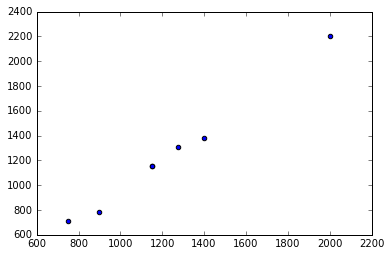

In [260]:
# Zip these predictions with the correct answers (Y_test) and compare
# them visually. You could graph them too if you want to.

import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)
zip(list(Y_test.values),predictions)

In [261]:
# sklearn.metrics.median_absolute_error to get a sense of how
# far wrong it was
sklearn.metrics.median_absolute_error(Y_test,predictions)

32.466069966069654

In [262]:
# Try the same with a sklearn.dummy.DummyRegressor() and 
# sklearn.tree.DecisionTreeRegressor()
import sklearn.dummy
d = sklearn.dummy.DummyRegressor()
d.fit(X_train[['Site']],Y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [263]:
d.score(X_train[['Site']],Y_train)

0.0

In [264]:
predictions = d.predict(X_test[['Site']])

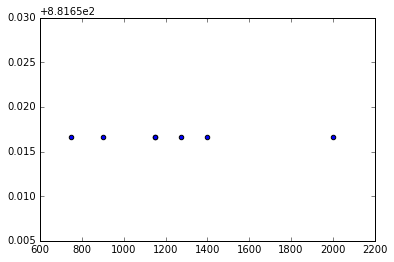

In [265]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)

In [266]:
sklearn.metrics.median_absolute_error(Y_test,predictions)

268.33333333333337

In [267]:
import sklearn.tree
t = sklearn.tree.DecisionTreeRegressor()
t.fit(X_train[['Site']],Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [268]:
t.score(X_train[['Site']],Y_train)

1.0

In [269]:
predictions = t.predict(X_test[['Site']])

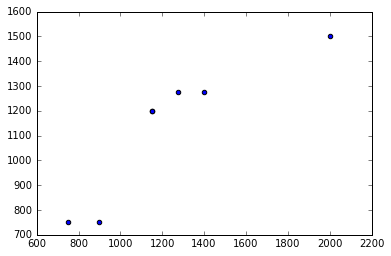

In [270]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)

In [271]:
zip(Y_test, predictions)

[(1400.0, 1275.0),
 (1275.0, 1275.0),
 (900.0, 750.0),
 (750.0, 750.0),
 (1150.0, 1200.0),
 (1150.0, 1200.0),
 (2000.0, 1500.0)]

In [272]:
sklearn.metrics.median_absolute_error(Y_test,predictions)

50.0

# Grid search

In [273]:
params = {
'max_depth': range(1,10),
}
t = sklearn.tree.DecisionTreeRegressor()
searcher = sklearn.grid_search.GridSearchCV(t,params,cv=10)
searcher.fit(X,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [274]:
searcher.best_score_

-0.56693195693195697

In [275]:
searcher.best_params_

{'max_depth': 6}

In [276]:
t = sklearn.tree.DecisionTreeRegressor()
t.max_depth = 6
t.fit(X[['Site']],Y)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [277]:
predictions = t.predict(X[['Site']])

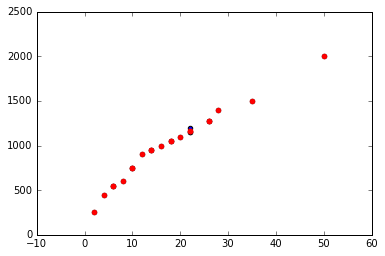

In [278]:
plt.scatter(X[['Site']],Y)
plt.scatter(X[['Site']],predictions,color='red')

Look at dots
If there is a linear relationship with few outliers, we should use linear regression
If.....................................lots........................RANSAC
If there has no any linear relationship(even non-linear) and some clusters, we use decision tree.